# 평가 : NCS 머신러닝 기반 데이터 분석 

## 데이터 소개
- 이번 주제는 League of Legends Diamond Ranked Games (10 min) 데이터셋을 사용합니다.

    
- 다음 1개의 csv 파일을 사용합니다.
    - high_diamond_ranked_10min.csv
    
    
- 각 파일의 컬럼은 아래와 같습니다.
    - gameId: 게임 판의 고유 ID
    - **blueWins**: 블루팀의 승리 여부 (0: 패배, 1: 승리)  <-- 타겟값
    - xxxWardsPlaced: xxx팀에서 설치한 와드의 수 
    - xxxWardsDestroyed: xxx팀에서 파괴한 와드의 수
    - xxxFirstBlood: xxx팀의 첫번째 킬 달성 여부
    - xxxKills: xxx팀의 킬 수
    - xxxDeaths: xxx팀의 죽음 수
    - xxxAssists: xxx팀의 어시스트 수
    - xxxEliteMonsters: xxx팀이 죽인 엘리트 몬스터 수
    - xxxDragons: xxx팀이 죽인 용의 수
    - xxxHeralds: xxx팀이 죽인 전령의 수
    - xxxTowersDestroyed: xxx팀이 파괴한 탑의 수
    - xxxTotalGold: xxx팀의 전체 획득 골드
    - xxxAvgLevel: xxx팀의 평균 레벨
    - xxxTotalExperience: xxx팀의 총 경험치 획득량
    - xxxTotalMinionsKilled: xxx팀의 총 미니언 킬 수
    - xxxTotalJungleMinionsKilled: xxx팀의 총 정글 미니언 킬 수
    - xxxGoldDiff: xxx팀과 다른 팀 간의 골드 획득량 차이
    - xxxExperienceDiff: xxx팀과 다른 팀과의 경험치 획득량 차이
    - xxxCSPerMin: xxx팀의 분당 CS 스코어
    - xxxGoldPerMin: xxx팀의 분당 골드 획득량
      
        
- 데이터 출처: https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

## 평가환경
- Jupyter Notebook
- scikit-learn

In [90]:
import pandas as pd

## 1_1. 데이터셋 준비
- 위 출처의 데이터셋 다운로드하여 현재 폴더에 저장하기
- DataFrame 으로 읽어 들이고 변수명 **df** 에 담기


- df.head() 출력하기

In [91]:
df = pd.read_csv("high_diamond_ranked_10min.csv")

In [92]:
df.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


## 1_2. EDA 및 데이터 기초 통계 분석
- df 의 각 컬럼 분석
- 기술통계량 분석

In [93]:
df.columns

Index(['gameId', 'blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [95]:
'''
총 9879개의 ROW가 있고 인덱스 0 ~ 9878
전부 9879 non-null 이므로 결측값이 없음
총 6개의 float와 나머지 int로 구성되어 있음
int 타입의 경우 '분류형'으로 보아야 하는 데이터들이 있을거임 -> describe에서 확인

'''

"\n총 9879개의 ROW가 있고 인덱스 0 ~ 9878\n전부 9879 non-null 이므로 결측값이 없음\n총 6개의 float와 나머지 int로 구성되어 있음\nint 타입의 경우 '분류형'으로 보아야 하는 데이터들이 있을거임 -> describe에서 확인\n\n"

In [96]:
df.describe()[['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed',
       'blueFirstBlood', 'blueKills', 'blueDeaths', 'blueAssists',
       'blueEliteMonsters', 'blueDragons', 'blueHeralds',
       'blueTowersDestroyed', 'blueTotalGold', 'blueAvgLevel',
       'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin']]

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,0.187974,0.051422,16503.455512,6.916004,17928.110133,216.699565,50.509667,14.414111,-33.620306,21.669956,1650.345551
std,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,0.390712,0.244369,1535.446636,0.305146,1200.523764,21.858437,9.898282,2453.349179,1920.370438,2.185844,153.544664
min,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10730.000000,4.600000,10098.000000,90.000000,0.000000,-10830.000000,-9333.000000,9.000000,1073.000000
25%,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15415.500000,6.800000,17168.000000,202.000000,44.000000,-1585.500000,-1290.500000,20.200000,1541.550000
50%,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16398.000000,7.000000,17951.000000,218.000000,50.000000,14.000000,-28.000000,21.800000,1639.800000
75%,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17459.000000,7.200000,18724.000000,232.000000,56.000000,1596.000000,1212.000000,23.200000,1745.900000
max,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,1.000000,4.000000,23701.000000,8.000000,22224.000000,283.000000,92.000000,11467.000000,8348.000000,28.300000,2370.100000


In [97]:
'''
너무 많은 칼럼들이 있어 블루팀과 레드팀을 나누어 보기로 했음
gameid 컬럼은 분석에 의미가 없어서 제외.

분류형으로 보이는 컬럼들: blueWins, blueFirstBlood

blueDragons, blueHeralds의 경우 min:0, max:1로 이루어져 있어 분류형으로 착각하기 쉽지만, 10분동안 전령과
드래곤을 한번만 죽일 수 있는 구조인 것을 확인해야 한다.
'''

'\n너무 많은 칼럼들이 있어 블루팀과 레드팀을 나누어 보기로 했음\ngameid 컬럼은 분석에 의미가 없어서 제외.\n\n분류형으로 보이는 컬럼들: blueWins, blueFirstBlood\n\nblueDragons, blueHeralds의 경우 min:0, max:1로 이루어져 있어 분류형으로 착각하기 쉽지만, 10분동안 전령과\n드래곤을 한번만 죽일 수 있는 구조인 것을 확인해야 한다.\n'

In [98]:
'''
## balanced vs imbalanced data 여부 확인
- blueWins와 blueFirstBlood의 평균이 약 0.5인데 이 데이터들은 balanced data 라고 할 수 있다.

## 이상치 확인
1. blueWardsPlaced, blueWardsDestroyed의 컬럼의 max값은 min ~ 75% 증가세에 비하면 굉장이 큰 값을 가지고 있다

2. blueKills, blueDeaths, blueAssists, blueTowersDestroyed의 컬럼도 위 두 컬럼보다는 아니지만 어느정도 
min ~ 75% 증가세에 비하면 큰 값을 가지고 있다.

3. blueTotalJungleMinionsKilled 컬럼은 최소 0의 값을 가지고 있는데 25% 데이터 범위에서 확 증가하는걸로 보아
이상치가 존재한다고 볼 수 있다. 그리고 75%에서 max까지의 범위도 마찬가지다.

통계적인 특징을 보려면
- 1,2번 같은 경우는 상위 몇개 데이터는 배제해볼 필요성이 존재한다.
- 3번 같은 경우는 하위 상위 몇개 데이터는 배제해볼 필요성이 존재한다.

'''

'\n## balanced vs imbalanced data 여부 확인\n- blueWins와 blueFirstBlood의 평균이 약 0.5인데 이 데이터들은 balanced data 라고 할 수 있다.\n\n## 이상치 확인\n1. blueWardsPlaced, blueWardsDestroyed의 컬럼의 max값은 min ~ 75% 증가세에 비하면 굉장이 큰 값을 가지고 있다\n\n2. blueKills, blueDeaths, blueAssists, blueTowersDestroyed의 컬럼도 위 두 컬럼보다는 아니지만 어느정도 \nmin ~ 75% 증가세에 비하면 큰 값을 가지고 있다.\n\n3. blueTotalJungleMinionsKilled 컬럼은 최소 0의 값을 가지고 있는데 25% 데이터 범위에서 확 증가하는걸로 보아\n이상치가 존재한다고 볼 수 있다. 그리고 75%에서 max까지의 범위도 마찬가지다.\n\n통계적인 특징을 보려면\n- 1,2번 같은 경우는 상위 몇개 데이터는 배제해볼 필요성이 존재한다.\n- 3번 같은 경우는 하위 상위 몇개 데이터는 배제해볼 필요성이 존재한다.\n\n'

In [99]:
df.describe()[[ 'redWardsPlaced', 'redWardsDestroyed',
       'redFirstBlood', 'redKills', 'redDeaths', 'redAssists',
       'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed',
       'redTotalGold', 'redAvgLevel', 'redTotalExperience',
       'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff',
       'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']]

,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,22.367952,2.723150,0.495192,6.137666,6.183925,6.662112,0.573135,0.413098,0.160036,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,18.457427,2.138356,0.500002,2.933818,3.011028,4.060612,0.626482,0.492415,0.366658,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,16.000000,2.000000,0.000000,6.000000,6.000000,6.000000,0.000000,0.000000,0.000000,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,0.000000,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,276.000000,24.000000,1.000000,22.000000,22.000000,28.000000,2.000000,1.000000,1.000000,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [100]:
'''
블루팀과 마찬가지로 분류형으로 보이는 컬럼은 redFirstBlood 이다.
'''

'\n블루팀과 마찬가지로 분류형으로 보이는 컬럼은 redFirstBlood 이다.\n'

## 2. 모델 학습을 위한 데이터 전처리


## 2_1. 학습에 불필요한 컬럼을 제거합니다
- **df** 에서 다음의 불필요한 컬럼들을 제거합니다 
>'gameId', 'redFirstBlood', 'redKills', 'redDeaths','redTotalGold', 'redTotalExperience', 'redGoldDiff','redExperienceDiff'

- 컬럼이 제거된 df.head() 출력 하기
- 컬럼이 제거된 df 의 column 개수 출력 하기

In [101]:
df = df.drop(columns = ['gameId', 'redFirstBlood', 'redKills', 'redDeaths','redTotalGold', 
                        'redTotalExperience', 'redGoldDiff','redExperienceDiff'])

In [102]:
df.head()

,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0,28,2,1,9,6,11,0,0,0,...,8,0,0,0,0,6.8,197,55,19.7,1656.7
1,0,12,1,0,5,5,5,0,0,0,...,2,2,1,1,1,6.8,240,52,24.0,1762.0
2,0,15,0,0,7,11,4,1,1,0,...,14,0,0,0,0,6.8,203,28,20.3,1728.5
3,0,43,1,0,4,5,5,1,0,1,...,10,0,0,0,0,7.0,235,47,23.5,1647.8
4,0,75,4,0,6,6,6,0,0,0,...,7,1,1,0,0,7.0,225,67,22.5,1740.4


In [103]:
df.columns

Index(['blueWins', 'blueWardsPlaced', 'blueWardsDestroyed', 'blueFirstBlood',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin'],
      dtype='object')

In [104]:
# df 의 column 개수 출력하기
len(df.columns) # 39개에서 32개로 줄어듦

32

## 2_2. 수치형 데이터 표준화하기
- df에서 수치형 데이터만 모아서 **X_num** 변수에 담기 (DataFrame)
- df에서 분류형 데이터만 모아서 **X_cat** 변수에 담기 (DataFrame)


- **StandardScaler** 를 사용하여 표준화를 진행한뒤 결과를 DataFrame 으로 바꾸어 변수 **X_scaled** 에 저장


- 데이터 **X** <= X_scaled 와 X_cat 을 합한 데이터 담기
- 타겟값 **y** <= 'blueWins'  담기


- X.head() 출력 
- X.describe() 출력

In [105]:
# TODO

In [106]:
# df 의 수치형 데이터만 담기
X_num = df[['blueWardsPlaced', 'blueWardsDestroyed',
       'blueKills', 'blueDeaths', 'blueAssists', 'blueEliteMonsters',
       'blueDragons', 'blueHeralds', 'blueTowersDestroyed', 'blueTotalGold',
       'blueAvgLevel', 'blueTotalExperience', 'blueTotalMinionsKilled',
       'blueTotalJungleMinionsKilled', 'blueGoldDiff', 'blueExperienceDiff',
       'blueCSPerMin', 'blueGoldPerMin', 'redWardsPlaced', 'redWardsDestroyed',
       'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds',
       'redTowersDestroyed', 'redAvgLevel', 'redTotalMinionsKilled',
       'redTotalJungleMinionsKilled', 'redCSPerMin', 'redGoldPerMin']]

In [107]:
# df 의 분류형 데이터만 담기
X_cat = df[['blueFirstBlood']]

In [108]:
# 수치형 입력 데이터 전처리
from sklearn.preprocessing import StandardScaler

In [109]:
# 표준화 한 결과 담기
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_num)
X_scaled

array([[ 0.31699566, -0.37927514,  0.93530086, ...,  0.36768454,
        -0.9287406 ,  0.05229268],
       [-0.57099219, -0.83906887, -0.39321635, ...,  0.06850362,
         1.0337835 ,  0.75861871],
       [-0.40449447, -1.2988626 ,  0.27104225, ..., -2.32494376,
        -0.65490002,  0.5339091 ],
       ...,
       [ 0.03949946, -0.83906887, -0.06108705, ...,  0.86631941,
         1.9922255 ,  1.22749041],
       [-0.45999371,  0.54031232, -1.38960425, ..., -1.12822007,
         1.35326417, -0.79892075],
       [-0.23799674, -1.2988626 , -0.06108705, ..., -0.52985823,
        -0.74618022, -0.77141898]])

In [110]:
X_scaled = pd.DataFrame(data=X_scaled, index=X_num.index, columns=X_num.columns)
X_scaled.head()

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin
0,0.316996,-0.379275,0.935301,-0.046926,1.071495,-0.879231,-0.753226,-0.481132,-0.210439,0.460179,...,0.329496,-0.914893,-0.838966,-0.436495,-0.198353,-0.410475,-0.928741,0.367685,-0.928741,0.052293
1,-0.570992,-0.839069,-0.393216,-0.387796,-0.404768,-0.879231,-0.753226,-0.481132,-0.210439,-1.166792,...,-1.148188,2.277700,1.191944,2.290977,4.412301,-0.410475,1.033784,0.068504,1.033784,0.758619
2,-0.404494,-1.298863,0.271042,1.657424,-0.650812,0.719503,1.327623,-0.481132,-0.210439,-0.254307,...,1.807181,-0.914893,-0.838966,-0.436495,-0.198353,-0.410475,-0.654900,-2.324944,-0.654900,0.533909
3,1.149484,-0.839069,-0.725346,-0.387796,-0.404768,0.719503,-0.753226,2.078430,-0.210439,-0.876959,...,0.822058,-0.914893,-0.838966,-0.436495,-0.198353,0.244627,0.805583,-0.430131,0.805583,-0.007406
4,2.925460,0.540312,-0.061087,-0.046926,-0.158724,-0.879231,-0.753226,-0.481132,-0.210439,-0.067382,...,0.083215,0.681403,1.191944,-0.436495,-0.198353,0.244627,0.349182,1.564408,0.349182,0.613731


In [111]:
# X_scaled 와 X_cat 합치기

X = pd.concat([X_scaled, X_cat], axis=1)

In [112]:
# 'blueWins' 담기

y = df['blueWins']
y

0       0
1       0
2       0
3       0
4       0
       ..
9874    1
9875    1
9876    0
9877    0
9878    1
Name: blueWins, Length: 9879, dtype: int64

In [113]:
# 출력하기
X.head()

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueFirstBlood
0,0.316996,-0.379275,0.935301,-0.046926,1.071495,-0.879231,-0.753226,-0.481132,-0.210439,0.460179,...,-0.914893,-0.838966,-0.436495,-0.198353,-0.410475,-0.928741,0.367685,-0.928741,0.052293,1
1,-0.570992,-0.839069,-0.393216,-0.387796,-0.404768,-0.879231,-0.753226,-0.481132,-0.210439,-1.166792,...,2.277700,1.191944,2.290977,4.412301,-0.410475,1.033784,0.068504,1.033784,0.758619,0
2,-0.404494,-1.298863,0.271042,1.657424,-0.650812,0.719503,1.327623,-0.481132,-0.210439,-0.254307,...,-0.914893,-0.838966,-0.436495,-0.198353,-0.410475,-0.654900,-2.324944,-0.654900,0.533909,0
3,1.149484,-0.839069,-0.725346,-0.387796,-0.404768,0.719503,-0.753226,2.078430,-0.210439,-0.876959,...,-0.914893,-0.838966,-0.436495,-0.198353,0.244627,0.805583,-0.430131,0.805583,-0.007406,0
4,2.925460,0.540312,-0.061087,-0.046926,-0.158724,-0.879231,-0.753226,-0.481132,-0.210439,-0.067382,...,0.681403,1.191944,-0.436495,-0.198353,0.244627,0.349182,1.564408,0.349182,0.613731,0


In [114]:
# 출력하기
X.describe()

,blueWardsPlaced,blueWardsDestroyed,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,...,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redAvgLevel,redTotalMinionsKilled,redTotalJungleMinionsKilled,redCSPerMin,redGoldPerMin,blueFirstBlood
count,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,...,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9879.000000
mean,-2.876982e-17,5.034719e-18,1.125619e-16,-1.179563e-16,-1.111234e-16,3.308530e-17,-8.702872e-17,-5.753965e-18,-2.733133e-17,-2.366318e-16,...,-8.918646e-17,-3.991813e-17,2.445435e-17,2.589284e-17,1.444245e-15,5.897814e-16,8.055551e-17,-1.352901e-15,-6.883180e-16,0.504808
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,0.500002
min,-9.594869e-01,-1.298863e+00,-2.053863e+00,-2.092146e+00,-1.634988e+00,-8.792310e-01,-7.532257e-01,-4.811324e-01,-2.104390e-01,-3.760305e+00,...,-9.148934e-01,-8.389657e-01,-4.364949e-01,-1.983529e-01,-6.961495e+00,-5.036349e+00,-4.718391e+00,-5.036349e+00,-3.539707e+00,0.000000
25%,-4.599937e-01,-8.390689e-01,-7.253456e-01,-7.286663e-01,-6.508123e-01,-8.792310e-01,-7.532257e-01,-4.811324e-01,-2.104390e-01,-7.085955e-01,...,-9.148934e-01,-8.389657e-01,-4.364949e-01,-1.983529e-01,-4.104749e-01,-6.549000e-01,-7.293122e-01,-6.549000e-01,-7.120554e-01,0.000000
50%,-3.489952e-01,8.051859e-02,-6.108705e-02,-4.692613e-02,-1.587244e-01,-8.792310e-01,-7.532257e-01,-4.811324e-01,-2.104390e-01,-6.868415e-02,...,-9.148934e-01,-8.389657e-01,-4.364949e-01,-1.983529e-01,2.446271e-01,2.970140e-02,-3.122336e-02,2.970140e-02,-7.448379e-02,1.000000
75%,-1.269983e-01,5.403123e-01,6.031716e-01,6.348140e-01,5.794075e-01,7.195032e-01,1.327623e+00,-4.811324e-01,-2.104390e-01,6.223550e-01,...,6.814033e-01,1.191944e+00,-4.364949e-01,-1.983529e-01,8.997291e-01,7.143028e-01,5.671385e-01,7.143028e-01,6.234576e-01,1.000000
max,1.263783e+01,1.111557e+01,5.252982e+00,5.406995e+00,5.500287e+00,2.318237e+00,1.327623e+00,2.078430e+00,1.615907e+01,4.687827e+00,...,2.277700e+00,1.191944e+00,2.290977e+00,9.022956e+00,4.175239e+00,3.270148e+00,4.057583e+00,3.270148e+00,4.187620e+00,1.000000


## 3. 최적 파라미터 찾기

- 위에서 만든 X, y 를 LogisticRegression 모델에 학습시키기 위한 최적의 파라미터를 찾는다
- 다음 2개의 파라미터 값의 grid 를 다음과 같이 주고 최적값을 찾아낸다
    - 'max_iter' : [100, 200, 300]
    - 'C' : [0.5, 1.0, 1.5, 2.0]
    
- GridSearchCV 사용


- 결과의 최적점수 출력하기
- 결과의 최적 파라미터 출력하기
- 결과의 cv_results_ 값을 DataFrame 으로 출력하기

In [115]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
import multiprocessing
param_grid = [{
    'max_iter' : [100, 200, 300],
    'C' : [0.5, 1.0, 1.5, 2.0]
}]

In [116]:
# TODO 최적 파라미터 찾기
gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, scoring='accuracy', cv=10,
             n_jobs=multiprocessing.cpu_count()  # cpu 개수만큼 job 을 생성해서 모델 수행
             )
result = gs.fit(X, y)

In [117]:
# TODO  결과의 최적점수 출력하기
print('최적 점수 : {}'.format(result.best_score_))

최적 점수 : 0.7313470870301776


In [118]:
# TODO 결과의 최적 파라미터 출력하기
print('최적 파라미터 : {}'.format(result.best_params_))

최적 파라미터 : {'C': 0.5, 'max_iter': 100}


In [119]:
# cv_results_ 값을 DataFrame 으로 출력하기
pd.DataFrame(result.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.205049,0.076434,0.006094,0.001442,0.5,100,"{'C': 0.5, 'max_iter': 100}",0.736842,0.733806,0.739879,0.719636,0.725709,0.723684,0.730769,0.752024,0.741903,0.709220,0.731347,0.011686,1
1,0.176895,0.022182,0.006995,0.002625,0.5,200,"{'C': 0.5, 'max_iter': 200}",0.736842,0.733806,0.739879,0.719636,0.725709,0.723684,0.730769,0.752024,0.741903,0.709220,0.731347,0.011686,1
2,0.188763,0.018448,0.005997,0.001344,0.5,300,"{'C': 0.5, 'max_iter': 300}",0.736842,0.733806,0.739879,0.719636,0.725709,0.723684,0.730769,0.752024,0.741903,0.709220,0.731347,0.011686,1
3,0.186462,0.016183,0.008282,0.004863,1,100,"{'C': 1.0, 'max_iter': 100}",0.737854,0.734818,0.738866,0.718623,0.725709,0.723684,0.730769,0.752024,0.741903,0.707194,0.731144,0.012189,4
4,0.174670,0.013424,0.006701,0.002314,1,200,"{'C': 1.0, 'max_iter': 200}",0.737854,0.734818,0.738866,0.718623,0.725709,0.723684,0.730769,0.752024,0.741903,0.707194,0.731144,0.012189,4
5,0.209039,0.051046,0.006034,0.001274,1,300,"{'C': 1.0, 'max_iter': 300}",0.737854,0.734818,0.738866,0.718623,0.725709,0.723684,0.730769,0.752024,0.741903,0.707194,0.731144,0.012189,4
6,0.201888,0.026468,0.009535,0.007063,1.5,100,"{'C': 1.5, 'max_iter': 100}",0.738866,0.734818,0.737854,0.718623,0.725709,0.723684,0.730769,0.752024,0.741903,0.707194,0.731144,0.012189,4
7,0.209016,0.029700,0.009036,0.010003,1.5,200,"{'C': 1.5, 'max_iter': 200}",0.738866,0.734818,0.737854,0.718623,0.725709,0.723684,0.730769,0.752024,0.741903,0.707194,0.731144,0.012189,4
8,0.204445,0.038055,0.007091,0.002981,1.5,300,"{'C': 1.5, 'max_iter': 300}",0.738866,0.734818,0.737854,0.718623,0.725709,0.723684,0.730769,0.752024,0.741903,0.707194,0.731144,0.012189,4
9,0.235712,0.067505,0.006782,0.001322,2,100,"{'C': 2.0, 'max_iter': 100}",0.738866,0.734818,0.737854,0.718623,0.725709,0.723684,0.730769,0.752024,0.741903,0.707194,0.731144,0.012189,4


## 4. 학습데이터와 테스트데이터 분리하기
- 학습용(train) : 테스트용(test) = 7:3 비율로 분리하기
- 분리된 각 데이터와 레이블은 아래 변수명으로 담습니다.
    - 학습용 데이터 X_train
    - 테스트용 데이터 X_test
    - 학습용 레이블 y_train
    - 테스트용 레이블 y_test
    
    
- 분리된 학습용 데이터개수와 테스트용 데이터 개수 출력하기    

In [120]:
from sklearn.model_selection import train_test_split

In [121]:
# 데이터 분할하기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)  # train:test = 7:3

In [122]:
# 분리된 학습용 데이터개수와 테스트용 데이터 개수 출력하기    
len(X_train), len(y_train), len(X_test), len(y_test) 

(6915, 6915, 2964, 2964)

## 4. Classification 모델 생성/학습하기
- LogisticRegression 모델로 학습합니다
- 모델 변수명 **model_lr**

In [123]:
# TODO : LogisticRegression 모델 생성/학습
model_lr = LogisticRegression(max_iter=100, C=0.5)
model_lr.fit(X_train, y_train)

LogisticRegression(C=0.5)

In [124]:
print('훈련 데이터 점수 : {}'.format(model_lr.score(X_train, y_train)))
print('평가 데이터 점수 : {}'.format(model_lr.score(X_test, y_test)))

훈련 데이터 점수 : 0.739117859725235
평가 데이터 점수 : 0.72165991902834


## 5. 교차검증 해보기
- 원 변수 X, y 에 대한 교차검증 (cross validation) 하기
- 4-fold(분할) cross validation 진행하기


- 교차검증의 정확도 score 출력

- 교차검증의 정확도 score 의 평균과 표준편차 출력


In [125]:
from sklearn.model_selection import cross_val_score, cross_validate  # 교차검증을 위해 두가지 제공됨
import numpy as np

In [126]:
# TODO : 교차검증 수행하기
scores = cross_val_score(model_lr, X, y, cv=4)

In [127]:
# TODO : 교차검증의 정확도 score 출력
print('교차 검증 정확도:{}'.format(scores))

교차 검증 정확도:[0.73360324 0.72631579 0.73198381 0.73106521]


In [128]:
# 교차검증의 정확도 score 의 평균과 표준편차 출력
print('교차 검증 정확도:{} +/- {}'.format(np.mean(scores), np.std(scores)))

교차 검증 정확도:0.7307420106486424 +/- 0.002712221072335411


## 6-1. 모델 학습 결과 평가하기
- 테스트 데이터에 대한 예측값을 내어보고
- 예측값에 대한  classification_report 출력하기

In [129]:
from sklearn.metrics import classification_report

In [130]:
pred = model_lr.predict(X_test)
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.73      0.70      0.72      1491
           1       0.71      0.74      0.73      1473

    accuracy                           0.72      2964
   macro avg       0.72      0.72      0.72      2964
weighted avg       0.72      0.72      0.72      2964



## 6-2 . ROC curve 그리기

- 테스트 결과에 따른 ROC curve 그리기


<예시>
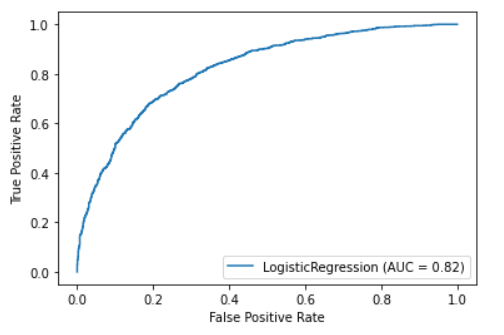

In [131]:
from sklearn.metrics import roc_curve
from sklearn.metrics import plot_roc_curve

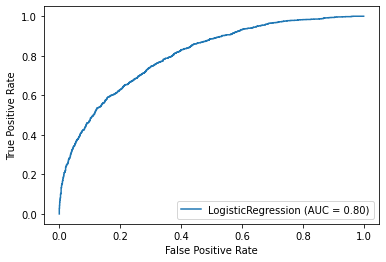

In [132]:
plot_roc_curve(model_lr, X_test, y_test)